## Лабораторная работа №4 по курсу "Интеллектуальный анализ данных"

выполнил Сорокин Никита, М8О-403Б-20

### 4.1 Кластеризация иерархическим алгоритмом

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [2]:
distance_mat = np.array([
    [0. ,  3.3,  3.2,  1.6,  4.8,  5.1], 
    [3.3,  0.,   4.5,  3.25, 1.2,  2.6], 
    [3.2,  4.5,  0. ,  1.4,  0.5,  2.3], 
    [1.6,  3.25, 1.4,  0. ,  4.2,  1.8],
    [4.8,  1.2,  0.5,  4.2,  0.,   2.6],
    [5.1,  2.6,  2.3,  1.8 , 2.6,  0. ]
])

In [3]:
upper_triangle_dist_mat = np.array(
    [3.3, 3.2, 1.6, 4.8, 5.1, 4.5, 3.25, 1.2, 2.6, 1.4, 0.5, 2.3, 4.2, 1.8, 2.6]
)

### Ближайший сосед

In [4]:
from sklearn.cluster import AgglomerativeClustering, ward_tree

In [5]:
Z = hierarchy.linkage(upper_triangle_dist_mat, "single")

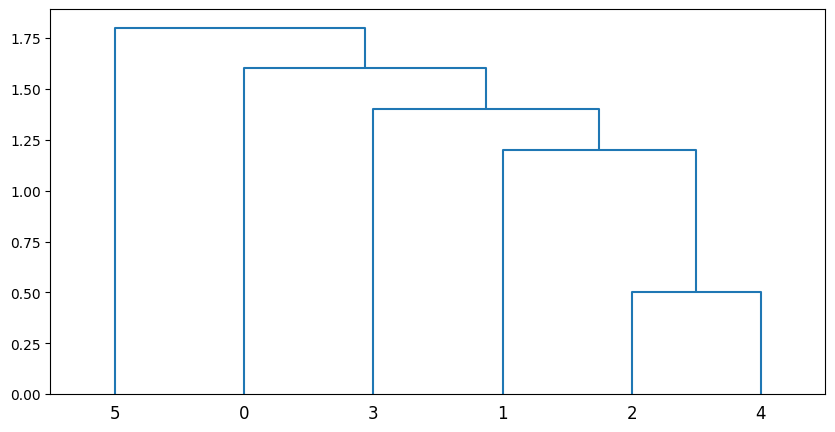

In [6]:
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Наиболее удаленный сосед

In [7]:
Z = hierarchy.linkage(upper_triangle_dist_mat, "complete")

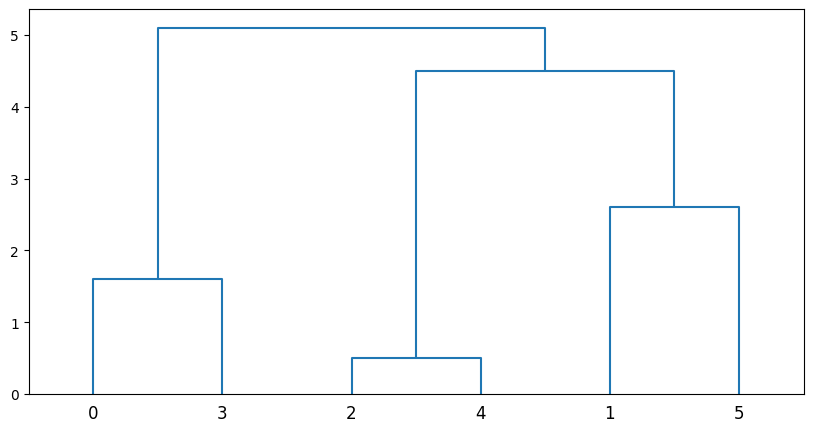

In [8]:
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Средняя связь

In [9]:
Z = hierarchy.linkage(upper_triangle_dist_mat, "average")

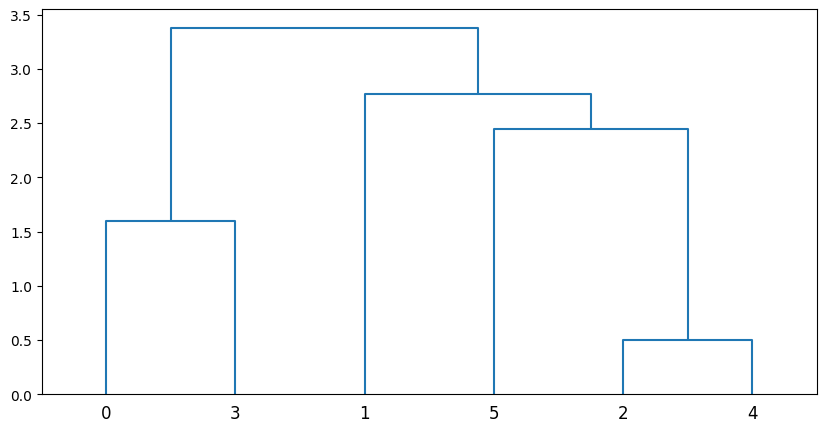

In [10]:
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Центроидный метод

In [11]:
Z = hierarchy.linkage(upper_triangle_dist_mat, "centroid")

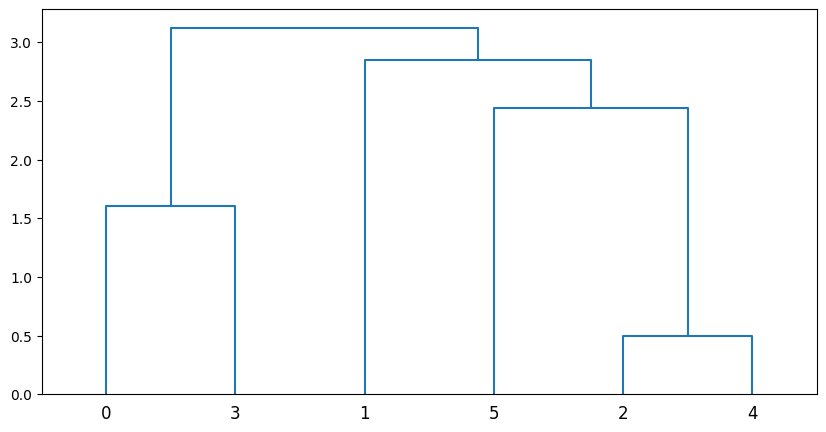

In [12]:
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Сравнение результатов

Используем метрику оценки Silhouette

In [13]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering

data = datasets.load_digits()
X, y = data.data, data.target

n_clusters = 6


algorithms = []
for i in range(2, n_clusters):
    algorithms.append(AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='single'))
    algorithms.append(AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='complete'))
    algorithms.append(AgglomerativeClustering(n_clusters=i, metric='precomputed', linkage='average'))

data = []
for algo in algorithms:
    algo.fit(distance_mat)
    data.append(
        (
            {
                "Silhouette": metrics.silhouette_score(distance_mat, algo.labels_)
            }
        )
    )

results = pd.DataFrame(
    data=data,
    columns=["Silhouette"],
    index=[
        'Single, n = 2', 'Complete, n = 2', 'Average, n = 2',
        'Single, n = 3', 'Complete, n = 3', 'Average, n = 3',
        'Single, n = 4', 'Complete, n = 4', 'Average, n = 4',
        'Single, n = 5', 'Complete, n = 5', 'Average, n = 5',
    ],
)

results

,Silhouette
"Single, n = 2",-0.099914
"Complete, n = 2",0.247890
"Average, n = 2",0.247890
"Single, n = 3",-0.107858
"Complete, n = 3",0.146005
"Average, n = 3",0.125300
"Single, n = 4",-0.037944
"Complete, n = 4",0.070679
"Average, n = 4",0.070679
"Single, n = 5",0.000967


Пример кластеризации большого искусственного датасета:

In [18]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

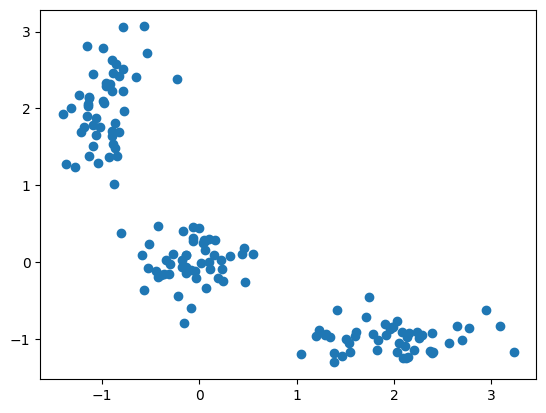

In [19]:
plt.scatter(X[:, 0], X[:, 1])

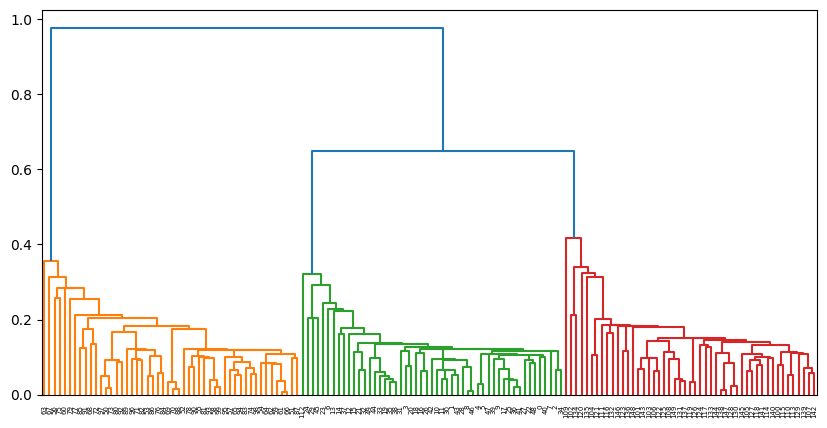

In [20]:
distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, "single")
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### 4.2 Кластеризация методом k-средних

6 вариант

In [21]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [22]:
X = np.array(
    [
        [2, 1], [5, 2], [-3, -1], [4, 2], [0, -1], [2, -2]
    ]
)

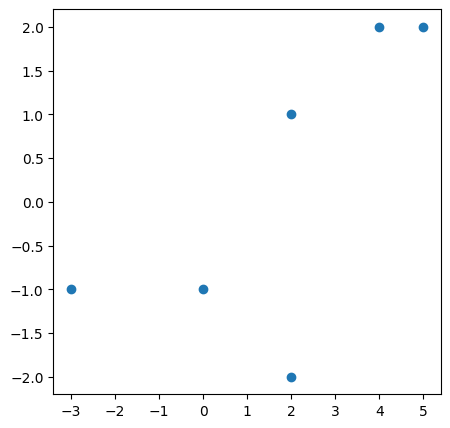

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])

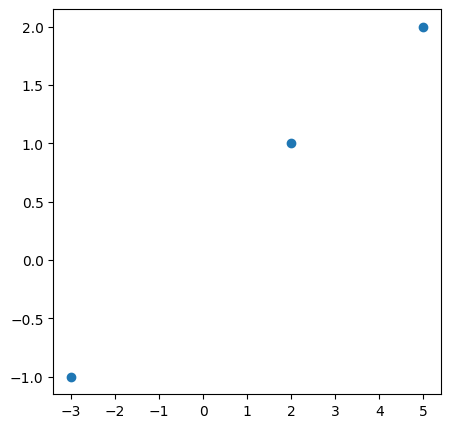

In [24]:
centroids = np.array([X[0, :], X[1, :], X[2, :]])

plt.figure(figsize=(5, 5))
plt.scatter(centroids[:, 0], centroids[:, 1])

In [28]:
cent_history = []
cent_history.append(centroids)

for i in range(3):
    distances = cdist(X, centroids)
    labels = distances.argmin(axis=1)

    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

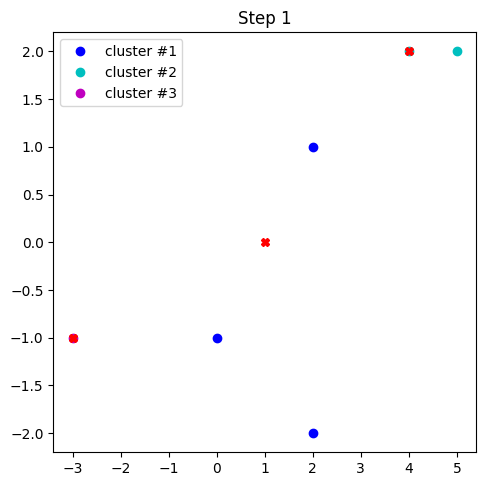

In [29]:
plt.figure(figsize=(12, 12))
for i in range(1):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="cluster #3")
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], "rX")
    plt.legend(loc=0)
    plt.title("Step {:}".format(i + 1));

### Выбор оптимального числа кластеров

In [30]:
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

График величины 'Inertia' уменьшает скорость убывания в тот момент когда количество кластеров оптимальное

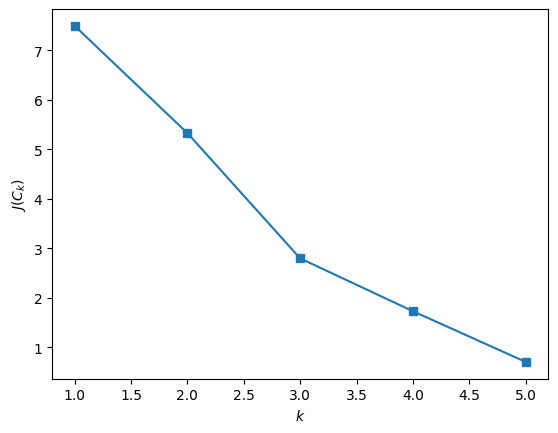

In [31]:
plt.plot(range(1, 6), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

### 4.3 Кластеризация ирисов Фишера

In [44]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd

In [34]:
iris = datasets.load_iris()

Загрузка датасета в пандас:

In [36]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [37]:
X = df.drop(['target'], axis=1)

In [38]:
target = df['target'].values
target = np.int16(target)

### PCA

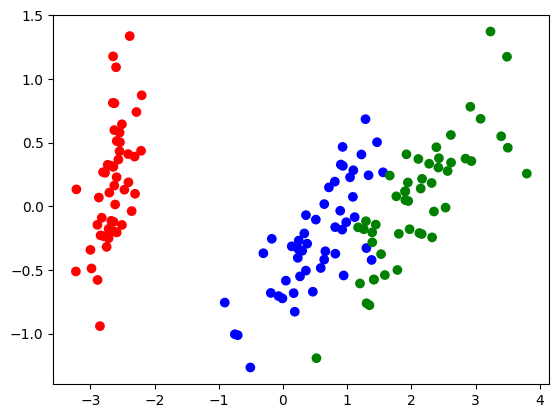

In [39]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

color_map = {
    '0': 'r',
    '1': 'b',
    '2': 'g'
}

colors = []
for i in range(target.shape[0]):
    colors.append(color_map[f'{target[i]}'])

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors)

In [40]:
gm = GaussianMixture(n_components=3).fit(X)

In [41]:
y_pred = gm.predict(X)

In [45]:
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



Визулизация через PCA:

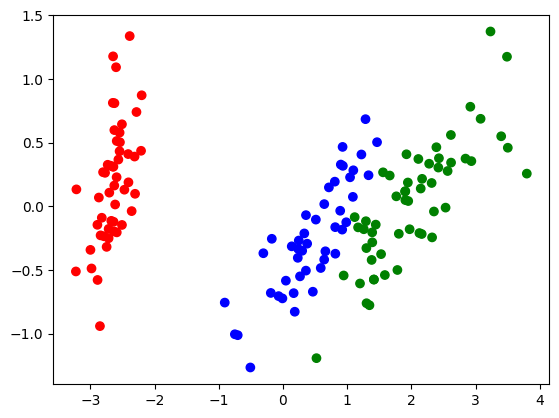

In [46]:
colors = []
for i in range(target.shape[0]):
    colors.append(color_map[f'{y_pred[i]}'])

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors)